In [2]:
import pandas as pd
data= pd.read_csv("Data1.csv",usecols=[0,1,3,5,7,9,11,13,15,17,19,21,23,27])

In [3]:
#將時間還有變形量移除
data2= pd.read_csv("Data1.csv",usecols=[1,3,5,7,9,11,13,15,17,19,21,27])
data2

,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Speed
0,30.28,30.25,30.30,30.17,30.13,30.35,30.12,30.03,30.42,28.2,29.83,3000
1,30.47,30.27,30.39,30.05,29.96,30.26,30.29,30.05,30.32,28.3,29.89,3000
2,30.18,30.31,29.99,30.13,29.98,30.20,30.25,30.15,30.24,28.3,29.91,3000
3,30.08,30.29,30.45,30.38,30.22,30.19,30.24,29.85,30.67,28.3,30.02,3000
4,30.46,30.09,29.86,30.04,29.92,30.41,30.38,30.25,30.55,28.2,29.90,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
14505,30.36,30.45,30.30,30.33,30.22,30.46,30.36,30.28,30.52,28.1,30.18,1
14506,30.36,30.46,30.30,30.32,30.22,30.46,30.36,30.29,30.51,28.1,30.18,1
14507,30.36,30.46,30.30,30.33,30.22,30.46,30.36,30.29,30.51,28.1,30.18,1
14508,30.36,30.46,30.30,30.33,30.22,30.45,30.36,30.28,30.52,28.1,30.17,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

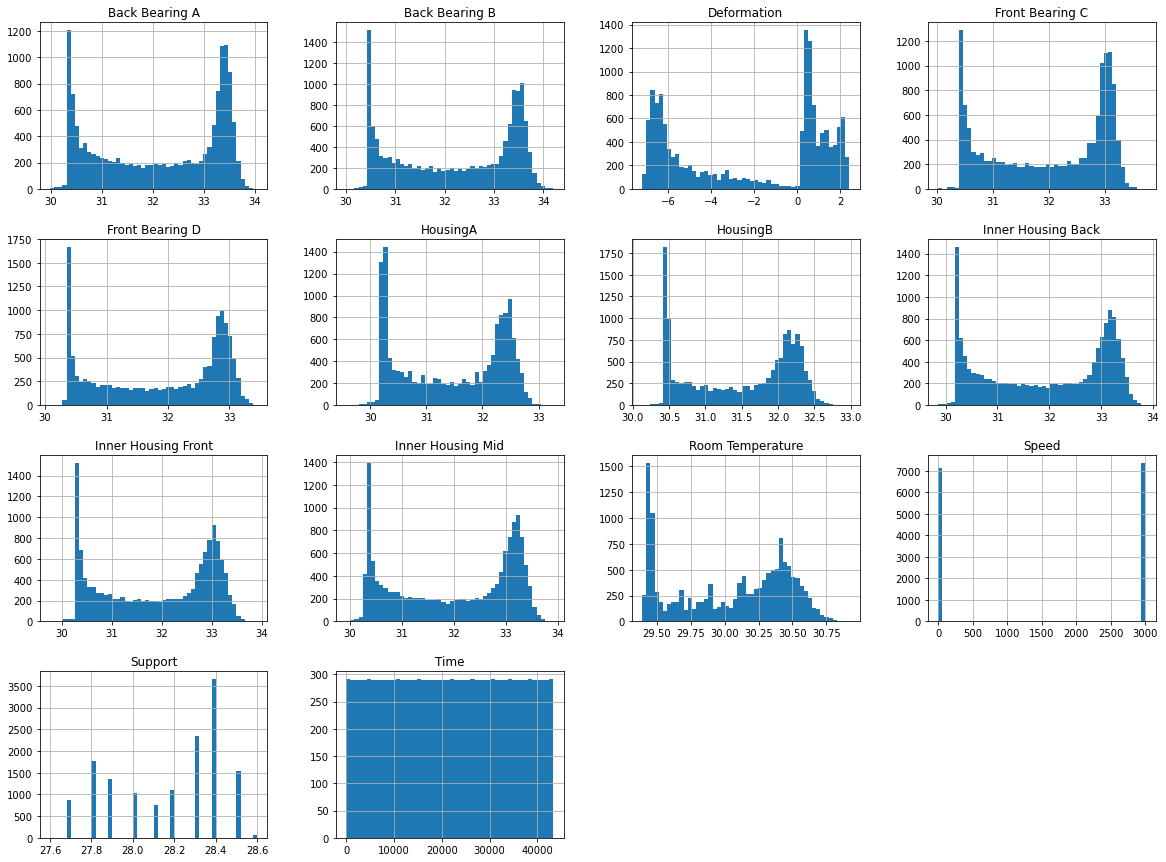

In [9]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
import numpy as np
np.random.seed(42)

In [25]:
x=data2.astype('float')
y=data.Deformation

0       -0.11
1       -5.16
2       -5.98
3       -6.22
4       -6.22
         ... 
14505   -5.95
14506   -5.90
14507   -5.86
14508   -5.77
14509   -5.69
Name: Deformation, Length: 14510, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [26]:
rfc=RandomForestClassifier(n_estimators=500,criterion='gini',random_state=42,min_samples_leaf = 100,min_samples_split=2)
rfc.fit(x_train,y_train.astype('int'))

RandomForestClassifier(min_samples_leaf=100, n_estimators=500, random_state=42)

In [14]:
y_predict=rfc.predict(x_test)
y_predict

array([-6,  2, -5, ..., -2, -6,  0])

In [16]:
rfc.score(x_test,y_test.astype('int'))

0.8759647188533627

In [36]:
errors = abs(y_predict - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.57 degrees.


In [37]:
imp=rfc.feature_importances_

In [38]:
imp

array([0.11201431, 0.10924634, 0.02892595, 0.07066025, 0.07081412,
       0.11855361, 0.11735845, 0.08099604, 0.09448663, 0.05508748,
       0.07206572, 0.06979111])

In [39]:
names=data2[0:0]
names

,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Speed


<function matplotlib.pyplot.show(*args, **kw)>

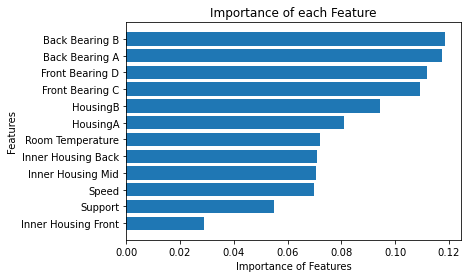

In [40]:
zip(imp,names)
imp, names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Feature')
plt.show

In [41]:
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()
#predict=model.fit(x_train,y_train).predict(x_test)
#predict

In [42]:
#model.score(x_test,y_test.astype('int'))

In [43]:
X_new = [[30.67,30.31,30.09,30.33,30.04,30.24,30.5,30.35,30.35,28.3,30.03,3000]]  # Cyprus' GDP per capita
print(rfc.predict(X_new))

[-6]


In [44]:
X_new = [[31.12,30.92,30.9,30.62,30.98,31.15,30.98,30.55,31.27,28.3,30.09,3000]]
print(rfc.predict(X_new))

[1]
